In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shapes of the loaded arrays
print("Training images shape:", x_train.shape)  # (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # (60000,)
print("Test images shape:", x_test.shape)       # (10000, 28, 28)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


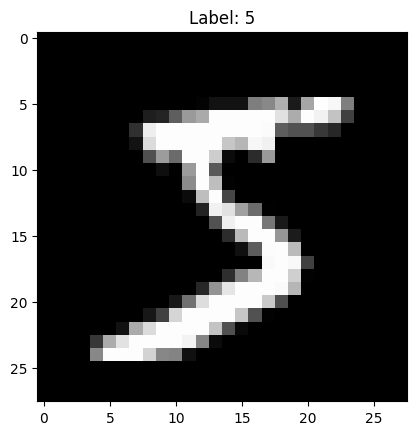

In [3]:
import matplotlib.pyplot as plt

# Display the first training image and its label
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()



In [4]:
# Normalize the images to [0,1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test = to_categorical(y_test, 10)

In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=128)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.7930 - loss: 0.6551 - val_accuracy: 0.9802 - val_loss: 0.0612
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9681 - loss: 0.1071 - val_accuracy: 0.9853 - val_loss: 0.0431
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9787 - loss: 0.0743 - val_accuracy: 0.9889 - val_loss: 0.0311
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9822 - loss: 0.0585 - val_accuracy: 0.9891 - val_loss: 0.0309
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9846 - loss: 0.0526 - val_accuracy: 0.9906 - val_loss: 0.0287
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9908 - val_loss: 0.0262
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.9872 - loss: 0.0400 - val_accuracy: 0.9920 - val_loss: 0.0234
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9905 - loss: 0.0319 - 

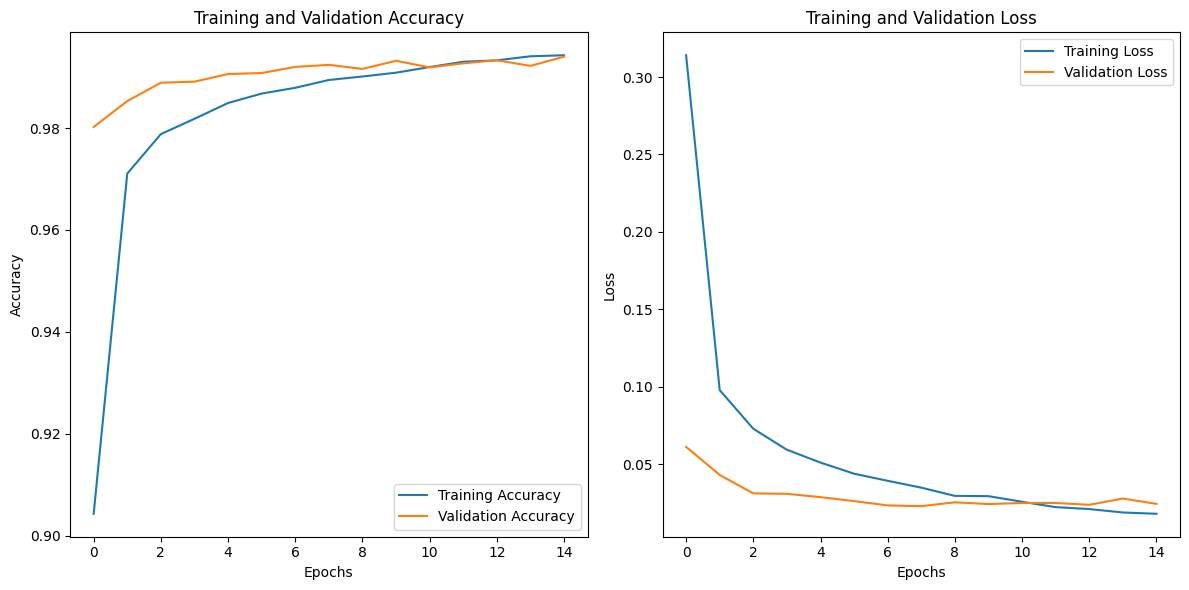

In [10]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model.save('tom.h5')

In [16]:
model.save("/content/drive/MyDrive/tom.keras", save_format="keras")




In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
